# Modern Control HW1
Padraic McAtee - 2/10/18

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp
import control 
from scipy.integrate import quad
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = 6.4, 4.8

## Exercise 2
part b - determine TF:

$G_{yu}=C(sI-A)^{-1}B$

In [2]:
sp.init_printing()

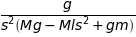

In [3]:
m,g,M,l,s = sp.symbols('m g M l s')
A = sp.Matrix([[0,0,1,0],
            [0,0,0,1],
            [0,-m*g/M,0,0],
            [0,(M+m)*g/M/l,0,0]])
B = sp.Matrix([[0,0,1/M,-1/l/M]]).T
C = sp.Matrix([[1,l,0,0]])
D = 0
sp.simplify((C*(s*sp.eye(4)-A).inv()*B)[0])

part e

In [4]:
# constants
M = 10
m = 1
g = 10

In [5]:
def s_min(l,omega):
    result = np.exp((np.pi)*((M+m)*g/M/l)**(1/2)/omega)
    return result

In [6]:
L = np.arange(.01,2,.01) # lengths
O = [10,12,15] # omegas

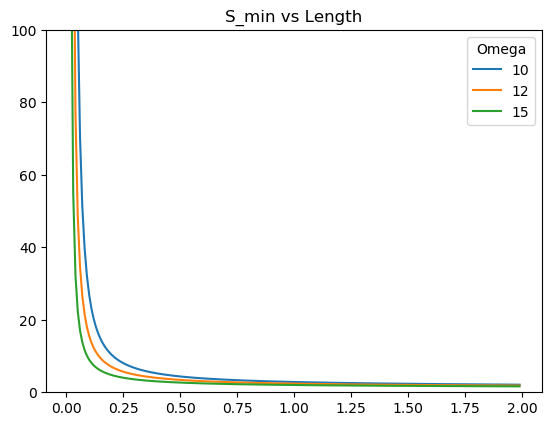

In [7]:
np.seterr(divide='ignore') # divide by zero error handling
for omega in O:
    plt.plot(L,s_min(L,omega),label=str(omega))
plt.ylim(ymax=100,ymin=0)
plt.legend(title='Omega')
plt.title('S_min vs Length');

part f - control output $y=x$

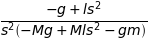

In [8]:
m,g,M,l,s = sp.symbols('m g M l s')
A = sp.Matrix([[0,0,1,0],
            [0,0,0,1],
            [0,-m*g/M,0,0],
            [0,(M+m)*g/M/l,0,0]])
B = sp.Matrix([[0,0,1/M,-1/l/M]]).T
C = sp.Matrix([[1,0,0,0]])
D = 0
sp.simplify((C*(s*sp.eye(4)-A).inv()*B)[0])

part g

In [9]:
# constants
M = 10
m = 1
g = 10

In [10]:
def doTheInt(z,omega):
    def f(x):
        return 2*z/(z**2+x**2)
    return quad(f,0,omega)[0]
def scalar_s_min_2(l,omega):
    z = np.sqrt(g/l)
    p = np.sqrt(g*(M+m)/(M*l))
    return np.exp(np.log((p+z)/(p-z))*np.pi/doTheInt(z,omega))

In [11]:
s_min_2 = np.vectorize(scalar_s_min_2)

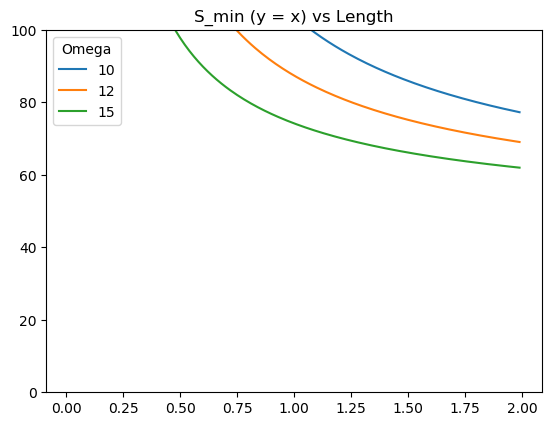

In [12]:
for omega in O:
    plt.plot(L,s_min_2(L,omega),label=str(omega))
plt.ylim(ymax=100,ymin=0)
plt.legend(title='Omega')
plt.title('S_min (y = x) vs Length');